In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/Q1.csv")
df.head(-5)

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not_Physical?
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,Yes,NaN
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,Male,United Kingdom,NaN,NaN,United Kingdom,NaN,Yes,it may require specific measures to accomodate...
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,Male,United States of America,Missouri,White,United States of America,Missouri,Maybe,I will sometimes bring up my psoriasis just as...
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,No,Anything that may hurt my chances to be hired ...
4,2017,0,100-500,1.0,0.0,Yes,No,30.0,Male,United States of America,California,White,United States of America,California,Maybe,It would depend on what it is..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,2021,0,26-100,0.0,1.0,NaN,No,45.0,Male,United States of America,Florida,White,United States of America,Florida,Maybe,Depends on the issue. If I needed something li...
1568,2021,0,100-500,0.0,1.0,NaN,Yes,30.0,Female,United States of America,New York,Black or African American,United States of America,New York,No,It's none of the employers business. I should ...
1569,2021,0,More than 1000,0.0,0.0,NaN,No,22.0,Female,India,NaN,NaN,India,NaN,Maybe,I would not be comfortable discussing it with ...
1570,2021,0,6-25,1.0,1.0,NaN,NaN,28.0,Male,Italy,NaN,NaN,Italy,NaN,Maybe,It's important to be clear and show my stand


In [3]:
df["Would you be willing to bring up a physical health issue with a potential employer in an interview?"].value_counts(normalize=True)*100

Maybe    39.695625
No       36.715282
Yes      23.589093
Name: Would you be willing to bring up a physical health issue with a potential employer in an interview?, dtype: float64

Is your employer primarily a tech company/organization?

In [28]:
len(df.iloc[:,-2].notna())

1577

In [5]:
df.iloc[:,3].unique()

array(['1.0', '0.0', 'True', 'False'], dtype=object)

In [6]:
df = df[df['Is your employer primarily a tech company/organization?'].notna()]

In [7]:
df.iloc[:,3] = df.iloc[:,3].replace({'True':'1.0', 'False':'0.0'})

In [8]:
df.iloc[:,3].unique()

array(['1.0', '0.0'], dtype=object)

In [9]:
df = df[df['Is your primary role within your company related to tech/IT?'].notna()]

In [26]:
len(df)

1577

In [10]:
df.iloc[:,4] = df.iloc[:,4].replace({'True':'1.0', 'False':'0.0'})

In [11]:
df.iloc[:,4].unique()

array(['1.0', '0.0'], dtype=object)

In [12]:
df["Is your employer primarily a tech company/organization?"].value_counts(normalize=True)*100

1.0    72.669626
0.0    27.330374
Name: Is your employer primarily a tech company/organization?, dtype: float64

In [13]:
df_Tech = df[df.iloc[:,3] == '1.0']
df_NonTech = df[df.iloc[:,3] == '0.0']

In [14]:
print(df_Tech['What is your gender?'].value_counts(normalize=True)*100)
print(df_NonTech['What is your gender?'].value_counts(normalize=True)*100)

Male      64.310646
Female    31.064572
Other      4.624782
Name: What is your gender?, dtype: float64
Male      64.269142
Female    31.786543
Other      3.944316
Name: What is your gender?, dtype: float64


In [36]:
print(df_Tech['Would you be willing to bring up a physical health issue with a potential employer in an interview?'].value_counts())

Maybe    461
No       408
Yes      277
Name: Would you be willing to bring up a physical health issue with a potential employer in an interview?, dtype: int64


In [45]:
print(df_Tech['Would you be willing to bring up a physical health issue with a potential employer in an interview?'].value_counts(normalize=True)*100)

Maybe    40.226876
No       35.602094
Yes      24.171030
Name: Would you be willing to bring up a physical health issue with a potential employer in an interview?, dtype: float64


# "Yes" to Bring Up Physical Health Issues

In [46]:
#Q1.1: Yes to "Bring up Physical Health Issue"
df_Tech_Y = df_Tech.loc[df['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] == 'Yes','Why or why not_Physical?']
print('length of df: ',len(df_Tech_Y))
print('number of missing value: ', df_Tech_Y.isnull().sum())
df_Tech_Y_mod = df_Tech_Y.dropna()
print('length of df after dropping missing values: ',len(df_Tech_Y_mod))

length of df:  277
number of missing value:  67
length of df after dropping missing values:  210


In [47]:
Q1_Tech_Y = df_Tech_Y_mod.tolist()
Q1_Tech_Y

['it may require specific measures to accomodate my needs',
 'I am not ashamed of it',
 "If it's relevant to the work - of course.i would be honest. ",
 'Honesty. ',
 'Little to no stigma attached to physical health issues.',
 'It may require special arrangements to be made or could possibly affect my ability to do my job if not handled properly.',
 "to determine if I'm adequate candidate and if so if their health insurance would cover some costs associated w/ treatment",
 "It's more accepted",
 'Because they may need to know in order for me to be an effective employee',
 'Because it may interfer with work',
 'Theoretically, ADA and other laws would prevent discrimination.',
 '\\-',
 'If it had the possibility of impacting my work',
 'Not knowing could be a bad thing.',
 'It is very important to prevent',
 'Physical health is generally seen as more acceptable.',
 'I would bring it up if it affects my attendance',
 'A physical health issue can be something which keeps me away from work 

In [48]:
import string
#import packages from nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
#import gensim and packages
import gensim
from gensim import corpora

In [59]:
#check the most frequent words in Yes answers
NLTK_stopwords = stopwords.words('english')

text = [word for line in Q1_Tech_Y for word in line.split() 
        if word not in NLTK_stopwords]
fdist = FreqDist(text)
k = 20
top_k_words, _ = zip(*fdist.most_common(k))
print(top_k_words)

('I', 'would', 'health', 'If', 'physical', 'work', 'issues', 'need', 'know', 'employer', 'It', 'issue', 'want', 'job', 'affect', 'Physical', 'may', 'bring', 'something', 'might')


In [87]:
#create a custom stopwords list
custom_stopwords = ['I', 'would', 'health', 'If', 'physical', 
                    'work', 'issues', 'need', 'know', 'employer', 
                    'It', 'issue', 'want', 'job', 'affect', 'Physical', 
                    'may', 'bring', 'something', 'might']

stop = NLTK_stopwords + custom_stopwords

generate a wordcloud to see the most frequent used words

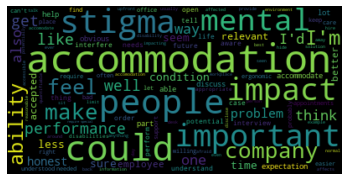

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text1 = " ".join(i for i in Q1_Tech_Y)
wordcloud1 = WordCloud(stopwords = stop).generate(text1)

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud1.png')
plt.show()

Use Gensim that leverages LDA model to discover topics

In [124]:
#define a function to remove punctuations and lemmatize words
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() 
                          if i not in stop])
    punc_free = ''.join(ch for ch in stop_free 
                        if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) 
                          for word in punc_free.split())
    return normalized

In [ ]:
#Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [125]:
#get a cleaned document
doc_clean_Q1Y_Tech = [clean(doc).split() for doc in Q1_Tech_Y]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q1Y_Tech = corpora.Dictionary(doc_clean_Q1Y_Tech)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q1Y_Tech = [dictionary_Q1Y_Tech.doc2bow(doc) for doc in doc_clean_Q1Y_Tech]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q1Y_Tech = Lda(doc_term_matrix_Q1Y_Tech, num_topics=3, id2word = dictionary_Q1Y_Tech, passes=50)

In [126]:
print(ldamodel_Q1Y_Tech.print_topics(num_topics=3, num_words=5))

[(0, '0.016*"performance" + 0.014*"could" + 0.013*"problem" + 0.012*"make" + 0.011*"me"'), (1, '0.018*"people" + 0.013*"accommodation" + 0.013*"important" + 0.012*"company" + 0.010*"like"'), (2, '0.014*"impact" + 0.011*"mental" + 0.010*"job" + 0.008*"disability" + 0.008*"obvious"')]


Since we're analyzing detailed explanations as to why they would bring up a physical issue during an interview, we could infer that the three most important topics are:
1. They need specific accommodations for their physical needs.
2. Stigmas related to the physical health conditions. 
3. How physical health issue affect their work.

Use SpaCy to discover what the answers are talking about

reference: http://robertorocha.info/using-nlp-to-analyze-open-ended-responses-in-surveys/

In [62]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1850000

In [63]:
type(df_Tech_Y)

pandas.core.series.Series

In [64]:
df_Tech_Y = df_Tech_Y.to_frame()

In [65]:
df_Tech_Y.to_csv('Yes Answers in Tech_Physical.csv', index=False)

In [66]:
df_Tech_Y = df_Tech_Y.dropna()

In [67]:
all_text_Tech_Y = df_Tech_Y["Why or why not_Physical?"].str.cat(sep = ' ')

In [68]:
doc_Tech_Y = nlp(all_text_Tech_Y, disable = ['ner'])

In [85]:
from collections import Counter

words_original = [token.lemma_ for token in doc_Tech_Y if not token.is_stop and not token.is_punct]
words = [word for word in words_original if word not in stop]
word_freq = Counter(words) 
word_freq.most_common(20)

[(' ', 35),
 ('accommodation', 17),
 ('impact', 16),
 ('important', 12),
 ('company', 12),
 ('mental', 12),
 ('stigma', 11),
 ('feel', 10),
 ('accommodate', 10),
 ('require', 9),
 ('ability', 9),
 ('performance', 9),
 ('understand', 9),
 ('discuss', 9),
 ('people', 9),
 ('think', 9),
 ('like', 9),
 ('problem', 8),
 ('way', 8),
 ('honest', 7)]

In [71]:
from spacy.matcher import Matcher 

matcher = Matcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
matcher.add('ADJ_PHRASE', [pattern]) 

matches = matcher(doc_Tech_Y, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(10)

[('physical health', 33),
 ('mental health', 9),
 ('physical issue', 4),
 ('physical issues', 4),
 ('physical disabilities', 3),
 ('physical injiry', 2),
 ('less stigma', 2),
 ('mental illness', 2),
 ('potential employer', 2),
 ('specific measures', 1)]

In [72]:
feel_adj = []
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'OP': '?'}, 
  {'LOWER': {'IN' : ['feel', 'am', "'m", 'are', "'re"]}}, 
  {'OP': '?'}, {'OP': '?'}, {'POS':'ADJ'}]
matcher.add("FeelAdj", [pattern]) 
matches = matcher(doc_Tech_Y, as_spans=True) 
for span in matches:
    feel_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])
Counter(feel_adj).most_common(20)

[('physical', 2),
 ('aware', 2),
 ('most', 2),
 ('afraid', 2),
 ('non', 2),
 ('ashamed', 1),
 ('adequate', 1),
 ('lucky', 1),
 ('open', 1),
 ('mental', 1),
 ('comfortable', 1),
 ('allergic', 1),
 ('tech', 1),
 ('-', 1),
 ('diabetic', 1),
 ('fit', 1),
 ('impaired', 1),
 ('able', 1)]

In [91]:
want_adj = []
matcher = Matcher(nlp.vocab) 
pattern = [{'LOWER' : {'IN' : ['because', 'Because']}}, {'IS_ALPHA':True, 'OP':'?'},
   {'LOWER': {'IN' : ['I', 'it']}}, {'IS_ALPHA':True, 'OP':'?'},
   {'IS_ALPHA':True, 'OP':'?'}, {'POS':'NOUN'}]
   
matcher.add("WantPhrase", [pattern]) 
matches = matcher(doc_Tech_Y, as_spans=True)

for span in matches:
    want_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])
Counter(want_adj).most_common(20)

[]

In [104]:
from spacy.matcher import PhraseMatcher
mental_health_colloc = []
matcher = PhraseMatcher(nlp.vocab, attr = 'LOWER') 
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive
pattern = [nlp.make_doc('physical health')]
matcher.add('physicalhealth', pattern)
matches = matcher(doc_Tech_Y)

for match_id, start, end in matches:
    span = doc_Tech_Y[start-15 : end+15]   
    mental_health_colloc.extend([token.lemma_.lower() for token 
                                 in span if not token.is_stop 
                                 and not token.is_punct]) 

Counter(mental_health_colloc).most_common(20)

[('health', 51),
 ('physical', 44),
 ('issue', 38),
 ('work', 16),
 ('affect', 11),
 (' ', 10),
 ('stigma', 9),
 ('people', 7),
 ('job', 7),
 ('mental', 7),
 ('need', 7),
 ('important', 6),
 ('impact', 6),
 ('employer', 6),
 ('require', 5),
 ('know', 5),
 ('bad', 5),
 ('performance', 5),
 ('understand', 5),
 ('discuss', 5)]

Rule-Based Sentiment Analysis in Python

reference: https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

In [126]:
df_Tech_Y

,Why or why not_Physical?
1,it may require specific measures to accomodate...
12,I am not ashamed of it
15,If it's relevant to the work - of course.i wou...
21,Honesty.
27,Little to no stigma attached to physical healt...
...,...
1552,It might help them understand any difficulties...
1560,There's no shame in seeking accommodations
1561,I'd discuss a physical health issue to find ou...
1565,I will bring it up because my employer needs t...


In [128]:
#remove all special characters and numericals 
import re
def cleanse(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

df_Tech_Y['Cleaned Answers'] = df_Tech_Y['Why or why not_Physical?'].apply(cleanse)
df_Tech_Y.head(5)

,Why or why not_Physical?,Cleaned Answers
1,it may require specific measures to accomodate...,it may require specific measures to accomodate...
12,I am not ashamed of it,I am not ashamed of it
15,If it's relevant to the work - of course.i wou...,If it s relevant to the work of course i would...
21,Honesty.,Honesty
27,Little to no stigma attached to physical healt...,Little to no stigma attached to physical healt...


In [129]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet


#POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in stop:
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df_Tech_Y['POS tagged'] = df_Tech_Y['Cleaned Answers'].apply(token_stop_pos)
df_Tech_Y.head(5)


,Why or why not_Physical?,Cleaned Answers,POS tagged
1,it may require specific measures to accomodate...,it may require specific measures to accomodate...,"[(require, v), (specific, a), (measures, n), (..."
12,I am not ashamed of it,I am not ashamed of it,"[(ashamed, v)]"
15,If it's relevant to the work - of course.i wou...,If it s relevant to the work of course i would...,"[(relevant, a), (course, n), (honest, a)]"
21,Honesty.,Honesty,"[(Honesty, n)]"
27,Little to no stigma attached to physical healt...,Little to no stigma attached to physical healt...,"[(Little, a), (stigma, n), (attached, v)]"


In [130]:
df_Tech_Y[['POS tagged']]

,POS tagged
1,"[(require, v), (specific, a), (measures, n), (..."
12,"[(ashamed, v)]"
15,"[(relevant, a), (course, n), (honest, a)]"
21,"[(Honesty, n)]"
27,"[(Little, a), (stigma, n), (attached, v)]"
...,...
1552,"[(help, v), (understand, v), (difficulties, n)..."
1560,"[(shame, n), (seeking, v), (accommodations, n)]"
1561,"[(discuss, v), (find, v), (company, n), (accom..."
1565,"[(needs, v), (aware, a), (personal, a), (life,..."


In [131]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_ans = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_ans = lemma_ans + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_ans = lemma_ans + " " + lemma
    return lemma_ans

df_Tech_Y['Lemma'] = df_Tech_Y['POS tagged'].apply(lemmatize)
df_Tech_Y.head(5)

,Why or why not_Physical?,Cleaned Answers,POS tagged,Lemma
1,it may require specific measures to accomodate...,it may require specific measures to accomodate...,"[(require, v), (specific, a), (measures, n), (...",require specific measure accomodate need
12,I am not ashamed of it,I am not ashamed of it,"[(ashamed, v)]",ashamed
15,If it's relevant to the work - of course.i wou...,If it s relevant to the work of course i would...,"[(relevant, a), (course, n), (honest, a)]",relevant course honest
21,Honesty.,Honesty,"[(Honesty, n)]",Honesty
27,Little to no stigma attached to physical healt...,Little to no stigma attached to physical healt...,"[(Little, a), (stigma, n), (attached, v)]",Little stigma attach


In [132]:
df_Tech_Y[['Why or why not_Physical?','Lemma']]

,Why or why not_Physical?,Lemma
1,it may require specific measures to accomodate...,require specific measure accomodate need
12,I am not ashamed of it,ashamed
15,If it's relevant to the work - of course.i wou...,relevant course honest
21,Honesty.,Honesty
27,Little to no stigma attached to physical healt...,Little stigma attach
...,...,...
1552,It might help them understand any difficulties...,help understand difficulty relate face perfo...
1560,There's no shame in seeking accommodations,shame seek accommodation
1561,I'd discuss a physical health issue to find ou...,discuss find company accommodate specific need
1565,I will bring it up because my employer needs t...,need aware personal life professional life


In [133]:
from textblob import TextBlob

def getSubjectivity(answer):
    return TextBlob(answer).sentiment.subjectivity

def getPolarity(answer):
    return TextBlob(answer).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [135]:
final_df = pd.DataFrame(df_Tech_Y[['Why or why not_Physical?', 'Lemma']])

In [136]:
type(final_df['Lemma'])

pandas.core.series.Series

In [137]:
final_df['Subjectivity'] = final_df['Lemma'].apply(getSubjectivity)
final_df['Polarity'] = final_df['Lemma'].apply(getPolarity) 
final_df['Analysis'] = final_df['Polarity'].apply(analysis)
final_df.head(5)

#apply(lambda x: get_tweet_sentiment(' '.join(x)))

,Why or why not_Physical?,Lemma,Subjectivity,Polarity,Analysis
1,it may require specific measures to accomodate...,require specific measure accomodate need,0.125,0.0000,Neutral
12,I am not ashamed of it,ashamed,0.000,0.0000,Neutral
15,If it's relevant to the work - of course.i wou...,relevant course honest,0.900,0.5000,Positive
21,Honesty.,Honesty,0.000,0.0000,Neutral
27,Little to no stigma attached to physical healt...,Little stigma attach,0.500,-0.1875,Negative


In [138]:
tb_counts = final_df.Analysis.value_counts()
tb_counts

Neutral     89
Positive    87
Negative    34
Name: Analysis, dtype: int64

In [139]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(answer):
    vs = analyzer.polarity_scores(answer)
    return vs['compound']
    
final_df['Vader Sentiment'] = final_df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
final_df['Vader Analysis'] = final_df['Vader Sentiment'].apply(vader_analysis)
final_df.head(5)



,Why or why not_Physical?,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
1,it may require specific measures to accomodate...,require specific measure accomodate need,0.125,0.0000,Neutral,0.0000,Neutral
12,I am not ashamed of it,ashamed,0.000,0.0000,Neutral,-0.4767,Neutral
15,If it's relevant to the work - of course.i wou...,relevant course honest,0.900,0.5000,Positive,0.5106,Positive
21,Honesty.,Honesty,0.000,0.0000,Neutral,0.4939,Neutral
27,Little to no stigma attached to physical healt...,Little stigma attach,0.500,-0.1875,Negative,0.0000,Neutral


In [140]:
vader_counts = final_df['Vader Analysis'].value_counts()
vader_counts

Neutral     157
Positive     44
Negative      9
Name: Vader Analysis, dtype: int64

In [142]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
   
    for word, pos in pos_data:
        if not pos:
            continue
        form = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not form:
            continue
        synsets = wordnet.synsets(form, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
            # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

final_df['SWN analysis'] = df_Tech_Y['POS tagged'].apply(sentiwordnetanalysis)
final_df.head(5)

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/snowe/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,Why or why not_Physical?,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
1,it may require specific measures to accomodate...,require specific measure accomodate need,0.125,0.0000,Neutral,0.0000,Neutral,Neutral
12,I am not ashamed of it,ashamed,0.000,0.0000,Neutral,-0.4767,Neutral,None
15,If it's relevant to the work - of course.i wou...,relevant course honest,0.900,0.5000,Positive,0.5106,Positive,Neutral
21,Honesty.,Honesty,0.000,0.0000,Neutral,0.4939,Neutral,Positive
27,Little to no stigma attached to physical healt...,Little stigma attach,0.500,-0.1875,Negative,0.0000,Neutral,Negative


In [143]:
swn_counts= final_df['SWN analysis'].value_counts()
swn_counts

Neutral     105
Positive     74
Negative     22
Name: SWN analysis, dtype: int64

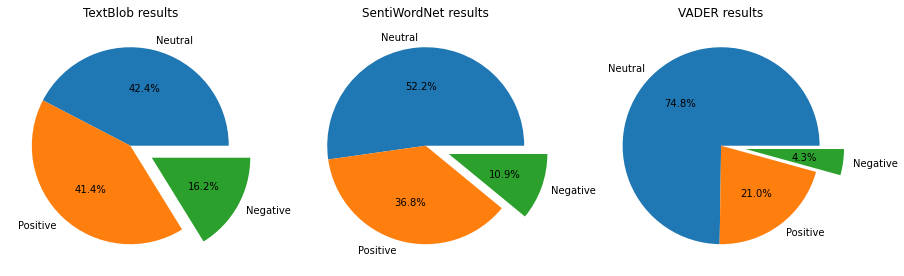

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,2)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,3)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


plt.show()

# "No" to Bring Up Physical Health Issues

In [92]:
#Q1.1: No to "Bring up Physical Health Issue"
df_N = df.loc[df['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] == 'No','Why or why not_Physical?']
print('length of df: ',len(df_N))
print('number of missing value: ', df_N.isnull().sum())
df_N_mod = df_N.dropna()
print('length of df after dropping missing values: ',len(df_N_mod))

length of df:  579
number of missing value:  112
length of df after dropping missing values:  467


In [93]:
Q1_N = df_N_mod.tolist()
Q1_N

['Anything that may hurt my chances to be hired is not going to be provided',
 'It seems like it would be a distraction.',
 "I want to maintain my privacy. Unless I end up with a physical health issue that would affect my work, I don't think it's their business",
 'Fear of not getting the job',
 'Fearful of not getting job.  ',
 'You will not get the job if you have anything wrong with you mental or physical. ',
 'I would not want to be seen as unable to do the work I was interviewing for and be discriminated against.',
 "I don't feel it's important to burden others with a problem that may not effect work efficiency ",
 'It would be an excuse to not hire me.',
 "They don't need to know if I am able to treat the symptoms, and have no negative effect on my work. ",
 "I don't have any physical illnesses that would impact upon my work. ",
 'Would be viewed as detrimental to chance of employment',
 'To avoid them making any perception on me which might affect my workflow and progress',
 "ph

In [94]:
#check the most frequent words in Yes answers of Q1
NLTK_stopwords = stopwords.words('english')

text = [word for line in Q1_N for word in line.split() if word not in NLTK_stopwords]
fdist = FreqDist(text)
k = 20
top_k_words, _ = zip(*fdist.most_common(k))
print(top_k_words)

('I', 'would', 'want', 'health', 'job', 'physical', 'job.', 'interview', 'It', 'think', 'work', 'feel', 'issue', 'hire', 'relevant', 'getting', 'get', 'affect', 'ability', 'might')


In [98]:
#create a custom stopwords list
custom_stopwords2 = ['I', 'would', 'want', 'health', 
                     'job', 'physical', 'job.', 'interview', 
                     'It', 'think', 'work', 'feel', 'issue', 
                     'hire', 'issues', 'getting', 'get', 
                     'affect', 'ability', 'might']

stop2 = set(NLTK_stopwords + custom_stopwords2)

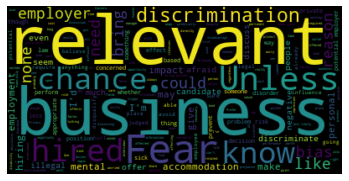

In [99]:
text2 = " ".join(i for i in Q1_N)
wordcloud3 = WordCloud(stopwords = stop2).generate(text2)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud3.png')
plt.show()

In [100]:
#define a function to remove punctuations and lemmatize words
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop2])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

#Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [101]:
#get a cleaned document
doc_clean_Q1N = [clean(doc).split() for doc in Q1_N]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q1N = corpora.Dictionary(doc_clean_Q1N)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q1N = [dictionary_Q1N.doc2bow(doc) for doc in doc_clean_Q1N]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q1N = Lda(doc_term_matrix_Q1N, num_topics=3, id2word = dictionary_Q1N, passes=50)

In [102]:
print(ldamodel_Q1N.print_topics(num_topics=3, num_words=5))

[(0, '0.025*"business" + 0.022*"fear" + 0.021*"relevant" + 0.015*"discrimination" + 0.015*"none"'), (1, '0.031*"unless" + 0.017*"bring" + 0.017*"impact" + 0.016*"like" + 0.011*"could"'), (2, '0.018*"know" + 0.018*"employer" + 0.012*"reason" + 0.012*"personal" + 0.010*"afraid"')]


# RULE-BASED APPROACH

In [147]:
#df_N = df_N.to_frame()

In [148]:
df_N = df_N.dropna()

In [149]:
df_N['Cleaned Answers'] = df_N['Why or why not_Physical?'].apply(cleanse)
df_N.head(5)

,Why or why not_Physical?,Cleaned Answers
3,Anything that may hurt my chances to be hired ...,Anything that may hurt my chances to be hired ...
5,It seems like it would be a distraction.,It seems like it would be a distraction
6,I want to maintain my privacy. Unless I end up...,I want to maintain my privacy Unless I end up ...
7,Fear of not getting the job,Fear of not getting the job
8,Fearful of not getting job.,Fearful of not getting job


In [150]:
df_N['POS tagged'] = df_N['Cleaned Answers'].apply(token_stop_pos)
df_N.head(5)

,Why or why not_Physical?,Cleaned Answers,POS tagged
3,Anything that may hurt my chances to be hired ...,Anything that may hurt my chances to be hired ...,"[(Anything, v), (hurt, v), (chances, n), (hire..."
5,It seems like it would be a distraction.,It seems like it would be a distraction,"[(seems, v), (like, None), (distraction, n)]"
6,I want to maintain my privacy. Unless I end up...,I want to maintain my privacy Unless I end up ...,"[(maintain, v), (privacy, n), (Unless, None), ..."
7,Fear of not getting the job,Fear of not getting the job,"[(Fear, n), (getting, v)]"
8,Fearful of not getting job.,Fearful of not getting job,"[(Fearful, n), (getting, v)]"


In [151]:
df_N['Lemma'] = df_N['POS tagged'].apply(lemmatize)
df_N.head(5)

,Why or why not_Physical?,Cleaned Answers,POS tagged,Lemma
3,Anything that may hurt my chances to be hired ...,Anything that may hurt my chances to be hired ...,"[(Anything, v), (hurt, v), (chances, n), (hire...",Anything hurt chance hire go provide
5,It seems like it would be a distraction.,It seems like it would be a distraction,"[(seems, v), (like, None), (distraction, n)]",seem like distraction
6,I want to maintain my privacy. Unless I end up...,I want to maintain my privacy Unless I end up ...,"[(maintain, v), (privacy, n), (Unless, None), ...",maintain privacy Unless end think business
7,Fear of not getting the job,Fear of not getting the job,"[(Fear, n), (getting, v)]",Fear get
8,Fearful of not getting job.,Fearful of not getting job,"[(Fearful, n), (getting, v)]",Fearful get


In [152]:
final_df2 = pd.DataFrame(df_N[['Why or why not_Physical?', 'Lemma']])

In [153]:
final_df2['Subjectivity'] = final_df2['Lemma'].apply(getSubjectivity)
final_df2['Polarity'] = final_df2['Lemma'].apply(getPolarity) 
final_df2['Analysis'] = final_df2['Polarity'].apply(analysis)
final_df2.head(5)

,Why or why not_Physical?,Lemma,Subjectivity,Polarity,Analysis
3,Anything that may hurt my chances to be hired ...,Anything hurt chance hire go provide,0.0,0.0,Neutral
5,It seems like it would be a distraction.,seem like distraction,0.0,0.0,Neutral
6,I want to maintain my privacy. Unless I end up...,maintain privacy Unless end think business,0.0,0.0,Neutral
7,Fear of not getting the job,Fear get,0.0,0.0,Neutral
8,Fearful of not getting job.,Fearful get,1.0,-0.9,Negative


In [154]:
tb_counts2 = final_df2.Analysis.value_counts()
tb_counts2

Neutral     254
Positive    123
Negative     90
Name: Analysis, dtype: int64

In [155]:
final_df2['Vader Sentiment'] = final_df2['Lemma'].apply(vadersentimentanalysis)
final_df2['Vader Analysis'] = final_df2['Vader Sentiment'].apply(vader_analysis)
final_df2.head(5)

,Why or why not_Physical?,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
3,Anything that may hurt my chances to be hired ...,Anything hurt chance hire go provide,0.0,0.0,Neutral,-0.3400,Neutral
5,It seems like it would be a distraction.,seem like distraction,0.0,0.0,Neutral,-0.0258,Neutral
6,I want to maintain my privacy. Unless I end up...,maintain privacy Unless end think business,0.0,0.0,Neutral,0.0000,Neutral
7,Fear of not getting the job,Fear get,0.0,0.0,Neutral,-0.4939,Neutral
8,Fearful of not getting job.,Fearful get,1.0,-0.9,Negative,-0.4939,Neutral


In [156]:
vader_counts2 = final_df2['Vader Analysis'].value_counts()
vader_counts2

Neutral     395
Negative     49
Positive     23
Name: Vader Analysis, dtype: int64

In [157]:
final_df2['SWN analysis'] = df_N['POS tagged'].apply(sentiwordnetanalysis)
final_df2.head(5)

,Why or why not_Physical?,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
3,Anything that may hurt my chances to be hired ...,Anything hurt chance hire go provide,0.0,0.0,Neutral,-0.3400,Neutral,Negative
5,It seems like it would be a distraction.,seem like distraction,0.0,0.0,Neutral,-0.0258,Neutral,Neutral
6,I want to maintain my privacy. Unless I end up...,maintain privacy Unless end think business,0.0,0.0,Neutral,0.0000,Neutral,Neutral
7,Fear of not getting the job,Fear get,0.0,0.0,Neutral,-0.4939,Neutral,Negative
8,Fearful of not getting job.,Fearful get,1.0,-0.9,Negative,-0.4939,Neutral,Positive


In [158]:
swn_counts2= final_df2['SWN analysis'].value_counts()
swn_counts2

Neutral     244
Negative    118
Positive     91
Name: SWN analysis, dtype: int64

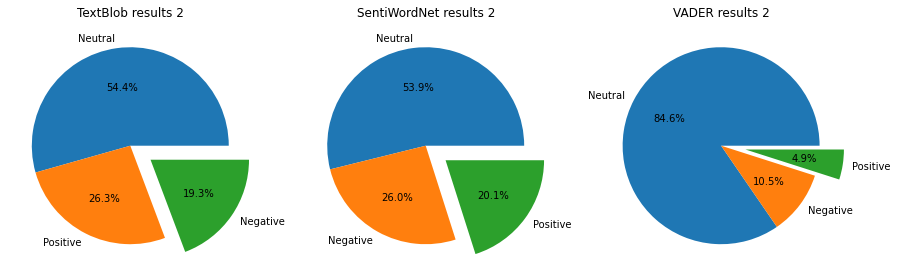

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results 2")
plt.pie(tb_counts2.values, labels = tb_counts2.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,2)
plt.title("SentiWordNet results 2")
plt.pie(swn_counts2.values, labels = swn_counts2.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,3)
plt.title("VADER results 2")
plt.pie(vader_counts2.values, labels = vader_counts2.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

#SpaCy

In [107]:
all_text_2 = df_N["Why or why not_Physical?"].str.cat(sep = ' ')

In [108]:
doc2 = nlp(all_text_2, disable = ['ner'])

In [109]:
from collections import Counter

words = [token.lemma_ for token in doc2 if not token.is_stop and not token.is_punct] 
word_freq = Counter(words) 
word_freq.most_common(20)

[('job', 107),
 ('issue', 71),
 ('health', 66),
 ('hire', 65),
 (' ', 64),
 ('interview', 64),
 ('want', 62),
 ('work', 48),
 ('physical', 45),
 ('relevant', 34),
 ('affect', 33),
 ('business', 32),
 ('feel', 32),
 ('think', 30),
 ('employer', 30),
 ('fear', 29),
 ('bring', 28),
 ('know', 25),
 ('chance', 24),
 ('ability', 24)]

In [110]:
from spacy.matcher import Matcher 

matcher = Matcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
matcher.add('ADJ_PHRASE', [pattern]) 

matches = matcher(doc2, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(10)

[('physical health', 28),
 ('mental health', 8),
 ('potential employer', 6),
 ('negative effect', 3),
 ('physical issue', 2),
 ('potential employers', 2),
 ('most employers', 2),
 ('private person', 2),
 ('special need', 2),
 ('personal business', 2)]

In [113]:
feel_adj = []
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'OP': '?'}, 
  {'LOWER': {'IN' : ['feel', 'am', "'m", 'are', "'re"]}}, 
  {'OP': '?'}, {'OP': '?'}, {'POS':'ADJ'}]
matcher.add("FeelAdj", [pattern]) 
matches = matcher(doc2, as_spans=True) 
for span in matches:
    feel_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])
Counter(feel_adj).most_common(20)

[('able', 3),
 ('afraid', 2),
 ('private', 2),
 ('comfortable', 2),
 ('fat', 1),
 ('interesting', 1),
 ('concerned', 1),
 ('sure', 1),
 ('potential', 1),
 ('bodied', 1),
 ('paranoid', 1),
 ('mental', 1),
 ('sick', 1),
 ('capable', 1)]

In [119]:
from spacy.matcher import PhraseMatcher
mental_health_colloc = []
matcher = PhraseMatcher(nlp.vocab, attr = 'LOWER') 
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive
pattern = [nlp.make_doc('potential employer')]
matcher.add('potential employer', pattern) 
matches = matcher(doc2)
for match_id, start, end in matches:
    span = doc2[start-10 : end+10]   
    mental_health_colloc.extend([token.lemma_.lower() for token in span if not token.is_stop and not token.is_punct]) 
Counter(mental_health_colloc).most_common(20)

[('potential', 6),
 ('employer', 6),
 ('health', 3),
 ('know', 3),
 ('business', 2),
 ('bias', 2),
 ('treatment', 2),
 ('view', 2),
 (' ', 1),
 ('believe', 1),
 ('probably', 1),
 ('care', 1),
 ('decide', 1),
 ('respectful', 1),
 ('disclosure', 1),
 ('likely', 1),
 ('hire', 1),
 ('physical', 1),
 ('relevant', 1),
 ('employability', 1)]